# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [744]:
m = 3
A = 0.10#872627258300784#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [745]:
(0.12872627258300784+0.12872634887695314)/2

0.12872631072998048

In [746]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [747]:
global compactified=true
global loggrid=false

global bisection=false

false

In [748]:
using Quadmath, Printf

res=m;
N=2.0^m*300.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*200.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [749]:
print(N)

1200.0

In [750]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [751]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [752]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
    global jacobian_func = Spline1D(originalX[4:L-3], analytic_jacobian(originalX[4:L-3]),  k=4);
end;

step size is  0.0008333333333333334
the time step is 0.00041666665


# Initial data of m β Ψ and Ψ,x

In [753]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [754]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [755]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [756]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

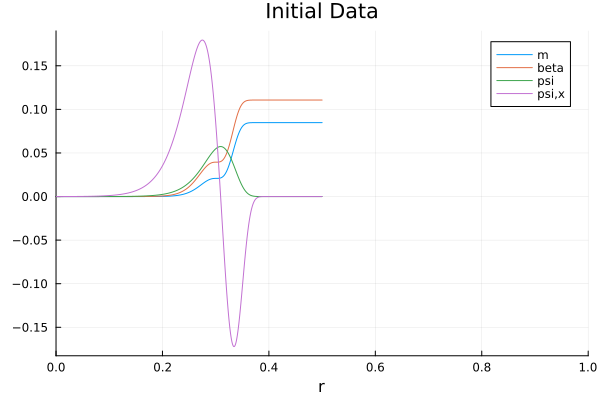

In [757]:
using Plots #showing initial data and the initial status of the horizon finder
plot(compactify.(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

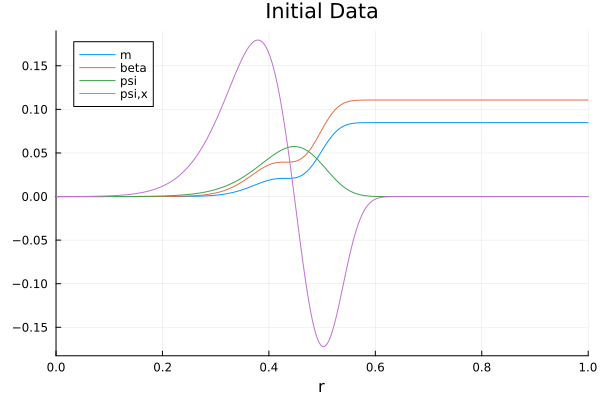

In [758]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [759]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [760]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [761]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.003337584767961


In [762]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [763]:
finaltime=5
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 20 dt is 0.00041666665, t=0.008333332999999997 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 40 dt is 0.00041666665, t=0.016666665999999993 speed is 0.49916701388888873, dx/dt=2.0000000800000035


iteration 60 dt is 0.00041666665, t=0.02499999900000002 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 80 dt is 0.00041666665, t=0.03333333200000004 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 100 dt is 0.00041666665, t=0.04166666500000007 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 120 dt is 0.00041666665, t=0.049999998000000094 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 140 dt is 0.00041666665, t=0.05833333100000012 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 160 dt is 0.00041666665, t=0.06666666400000008 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 180 dt is 0.00041666665, t=0.07499999699999997 speed is 0.4991670138888888, dx/dt=



iteration 1480 dt is 0.00041666665, t=0.6166666419999934 speed is 0.49916701388881557, dx/dt=2.0000000800000035


iteration 1500 dt is 0.00041666665, t=0.6249999749999925 speed is 0.4991670138888036, dx/dt=2.0000000800000035


iteration 1520 dt is 0.00041666665, t=0.6333333079999915 speed is 0.49916701388878987, dx/dt=2.0000000800000035


iteration 1540 dt is 0.00041666665, t=0.6416666409999906 speed is 0.4991670138887744, dx/dt=2.0000000800000035


iteration 1560 dt is 0.00041666665, t=0.6499999739999897 speed is 0.4991670138887567, dx/dt=2.0000000800000035


iteration 1580 dt is 0.00041666665, t=0.6583333069999887 speed is 0.4991670138887369, dx/dt=2.0000000800000035


iteration 1600 dt is 0.00041666665, t=0.6666666399999878 speed is 0.49916701388871465, dx/dt=2.0000000800000035


iteration 1620 dt is 0.00041666665, t=0.6749999729999868 speed is 0.49916701388868995, dx/dt=2.0000000800000035


iteration 1640 dt is 0.00041666665, t=0.6833333059999859 speed is 0.49916701388866214, dx/



iteration 2940 dt is 0.00041666665, t=1.2249999509999843 speed is 0.4991670138888884, dx/dt=2.0000000800000035


iteration 2960 dt is 0.00041666665, t=1.2333332839999855 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 2980 dt is 0.00041666665, t=1.2416666169999868 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 3000 dt is 0.00041666665, t=1.249999949999988 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 3020 dt is 0.00041666665, t=1.2583332829999894 speed is 0.4991670138888883, dx/dt=2.0000000800000035


iteration 3040 dt is 0.00041666665, t=1.2666666159999906 speed is 0.49916701388888596, dx/dt=2.0000000800000035


iteration 3060 dt is 0.00041666665, t=1.274999948999992 speed is 0.4991670138888799, dx/dt=2.0000000800000035


iteration 3080 dt is 0.00041666665, t=1.2833332819999932 speed is 0.4991670138888672, dx/dt=2.0000000800000035


iteration 3100 dt is 0.00041666665, t=1.2916666149999945 speed is 0.4991670138888444, dx/dt=2



iteration 4400 dt is 0.00041666665, t=1.8333332600000773 speed is 0.4991670138739994, dx/dt=2.0000000800000035


iteration 4420 dt is 0.00041666665, t=1.8416665930000786 speed is 0.49916701387850937, dx/dt=2.0000000800000035


iteration 4440 dt is 0.00041666665, t=1.84999992600008 speed is 0.4991670138820935, dx/dt=2.0000000800000035


iteration 4460 dt is 0.00041666665, t=1.8583332590000812 speed is 0.4991670138847712, dx/dt=2.0000000800000035


iteration 4480 dt is 0.00041666665, t=1.8666665920000824 speed is 0.4991670138866279, dx/dt=2.0000000800000035


iteration 4500 dt is 0.00041666665, t=1.8749999250000837 speed is 0.49916701388780005, dx/dt=2.0000000800000035


iteration 4520 dt is 0.00041666665, t=1.883333258000085 speed is 0.4991670138884537, dx/dt=2.0000000800000035


iteration 4540 dt is 0.00041666665, t=1.8916665910000863 speed is 0.4991670138887589, dx/dt=2.0000000800000035


iteration 4560 dt is 0.00041666665, t=1.8999999240000875 speed is 0.4991670138888661, dx/dt=2.0



iteration 5860 dt is 0.00041666665, t=2.44166656900017 speed is 0.4991670138888752, dx/dt=2.0000000800000035


iteration 5880 dt is 0.00041666665, t=2.4499999020001715 speed is 0.49916701388887863, dx/dt=2.0000000800000035


iteration 5900 dt is 0.00041666665, t=2.4583332350001728 speed is 0.49916701388888124, dx/dt=2.0000000800000035


iteration 5920 dt is 0.00041666665, t=2.466666568000174 speed is 0.49916701388888324, dx/dt=2.0000000800000035


iteration 5940 dt is 0.00041666665, t=2.4749999010001753 speed is 0.4991670138888848, dx/dt=2.0000000800000035


iteration 5960 dt is 0.00041666665, t=2.4833332340001766 speed is 0.4991670138888858, dx/dt=2.0000000800000035


iteration 5980 dt is 0.00041666665, t=2.491666567000178 speed is 0.49916701388888673, dx/dt=2.0000000800000035


iteration 6000 dt is 0.00041666665, t=2.499999900000179 speed is 0.4991670138888873, dx/dt=2.0000000800000035


iteration 6020 dt is 0.00041666665, t=2.5083332330001804 speed is 0.4991670138888878, dx/dt=2.0



iteration 7320 dt is 0.00041666665, t=3.0499998780002633 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 7340 dt is 0.00041666665, t=3.0583332110002646 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 7360 dt is 0.00041666665, t=3.066666544000266 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 7380 dt is 0.00041666665, t=3.074999877000267 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 7400 dt is 0.00041666665, t=3.0833332100002684 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 7420 dt is 0.00041666665, t=3.0916665430002697 speed is 0.49916701388888873, dx/dt=2.0000000800000035


iteration 7440 dt is 0.00041666665, t=3.099999876000271 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 7460 dt is 0.00041666665, t=3.108333209000272 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 7480 dt is 0.00041666665, t=3.1166665420002735 speed is 0.4991670138888888, dx/dt=2.0



iteration 8780 dt is 0.00041666665, t=3.6583331870003564 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 8800 dt is 0.00041666665, t=3.6666665200003576 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 8820 dt is 0.00041666665, t=3.674999853000359 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 8840 dt is 0.00041666665, t=3.68333318600036 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 8860 dt is 0.00041666665, t=3.6916665190003615 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 8880 dt is 0.00041666665, t=3.6999998520003627 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 8900 dt is 0.00041666665, t=3.708333185000364 speed is 0.49916701388888896, dx/dt=2.0000000800000035


iteration 8920 dt is 0.00041666665, t=3.7166665180003653 speed is 0.49916701388888873, dx/dt=2.0000000800000035


iteration 8940 dt is 0.00041666665, t=3.7249998510003666 speed is 0.4991670138888888, dx/dt=2.



iteration 10240 dt is 0.00041666665, t=4.266666496000165 speed is 0.49916701388888873, dx/dt=2.0000000800000035


iteration 10260 dt is 0.00041666665, t=4.274999829000158 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 10280 dt is 0.00041666665, t=4.28333316200015 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 10300 dt is 0.00041666665, t=4.291666495000142 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 10320 dt is 0.00041666665, t=4.299999828000135 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 10340 dt is 0.00041666665, t=4.308333161000127 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 10360 dt is 0.00041666665, t=4.31666649400012 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 10380 dt is 0.00041666665, t=4.324999827000112 speed is 0.49916701388888896, dx/dt=2.0000000800000035


iteration 10400 dt is 0.00041666665, t=4.333333160000104 speed is 0.49916701388888884, dx/dt=



iteration 11700 dt is 0.00041666665, t=4.87499980499961 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 11720 dt is 0.00041666665, t=4.883333137999602 speed is 0.49916701388888873, dx/dt=2.0000000800000035


iteration 11740 dt is 0.00041666665, t=4.891666470999595 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 11760 dt is 0.00041666665, t=4.899999803999587 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 11780 dt is 0.00041666665, t=4.9083331369995795 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 11800 dt is 0.00041666665, t=4.916666469999572 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 11820 dt is 0.00041666665, t=4.924999802999564 speed is 0.4991670138888888, dx/dt=2.0000000800000035


iteration 11840 dt is 0.00041666665, t=4.933333135999557 speed is 0.49916701388888884, dx/dt=2.0000000800000035


iteration 11860 dt is 0.00041666665, t=4.941666468999549 speed is 0.49916701388888884, dx

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [749]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step710.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

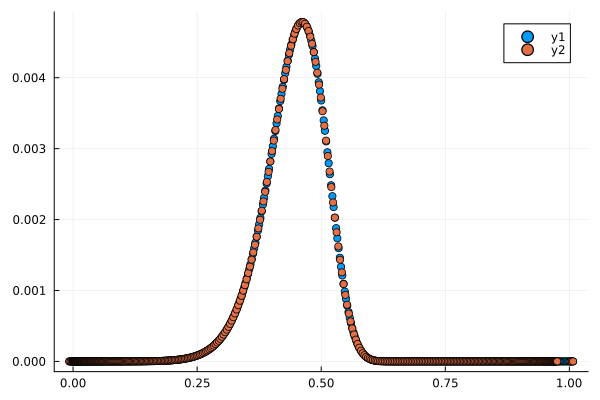

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

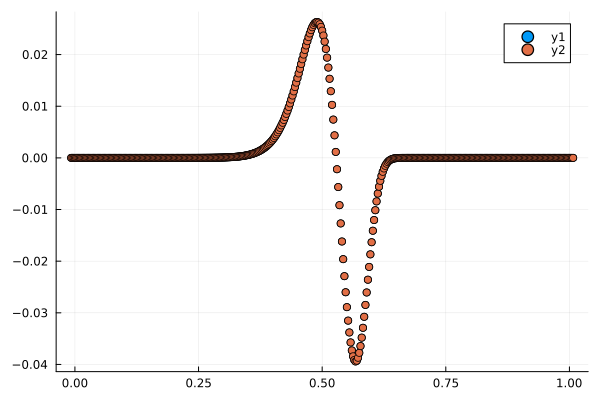

In [417]:
scatter([x1,x1],[y1,y2])